<a href="https://colab.research.google.com/github/marcoapedroza/python-stock-analysis-ML-AI/blob/main/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement and Project Overview
*   Help investors to suitably manage their portfolios:
  *   Stock Data Visualization;
  *   Useful Patterns Search;
  *   Stock Daily Returns;
  *   Daily Returns Correlations;
  *   Beta Coefficient.


### Import datasets and libraries:

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import pyfolio as pf

In [ ]:
tickers = 'ABEV3.SA B3SA3.SA BBDC3.SA BRKM5.SA CCRO3.SA ELET3.SA EMBR3.SA MGLU3.SA LAME4.SA PETR3.SA'
ticker = '^BVSP'

# Adjusted Close Stock Prices
stocks_df = yf.download(tickers, start="2013-01-01")['Adj Close']
bovespa = yf.download(ticker, start="2013-01-01")['Adj Close']


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks_df.isna().sum()

ABEV3.SA    1
B3SA3.SA    1
BBDC3.SA    1
BRKM5.SA    1
CCRO3.SA    1
ELET3.SA    1
EMBR3.SA    1
LAME4.SA    1
MGLU3.SA    1
PETR3.SA    1
dtype: int64

In [ ]:
bovespa.isna().sum()

0

In [ ]:
stocks_df.dropna(how='all', inplace=True)
stocks_df.isna().sum()

ABEV3.SA    0
B3SA3.SA    0
BBDC3.SA    0
BRKM5.SA    0
CCRO3.SA    0
ELET3.SA    0
EMBR3.SA    0
LAME4.SA    0
MGLU3.SA    0
PETR3.SA    0
dtype: int64

In [ ]:
bovespa

Date
2013-01-02     62550.000000
2013-01-03     63312.000000
2013-01-04     62523.000000
2013-01-07     61933.000000
2013-01-08     61128.000000
                  ...      
2021-02-26    110035.000000
2021-03-01    110335.000000
2021-03-02    111540.000000
2021-03-03    111184.000000
2021-03-04    114035.171875
Name: Adj Close, Length: 2018, dtype: float64

In [ ]:
stocks_df

ABEV3.SA   B3SA3.SA   BBDC3.SA  ...   LAME4.SA   MGLU3.SA   PETR3.SA
Date                                         ...                                 
2013-01-02  12.468795  10.506537  11.001677  ...  10.699188   0.362545  17.815228
2013-01-03  12.689861  10.506537  11.605797  ...  10.699188   0.377499  18.479706
2013-01-04  12.480665  10.312937  11.577574  ...  10.699188   0.375242  18.542559
2013-01-07  12.624581  10.260814  11.304679  ...  10.699188   0.366495  18.300117
2013-01-08  12.609744  10.350169  11.267038  ...  10.699188   0.363956  17.779306
...               ...        ...        ...  ...        ...        ...        ...
2021-02-26  14.020000  54.299999  20.572170  ...  24.910000  24.180000  22.150000
2021-03-01  13.770000  54.349998  19.902750  ...  24.680000  24.549999  22.010000
2021-03-02  13.990000  56.009998  20.250000  ...  24.250000  24.270000  21.910000
2021-03-03  14.170000  56.590000  20.660000  ...  23.910000  25.120001  20.969999
2021-03-04  14.710000  56.169998  21.620001  ...  24.780001  25.370001  21.930000

[2024 rows x 10 columns]

In [ ]:
stocks_df = pd.merge(stocks_df, bovespa, on='Date')
# stocks_df = stocks_df.rename(columns = {'Adj Close': 'BOVESPA'})
stocks_df.columns = ['ABEV3', 'B3SA3', 'BBDC3', 'BRKM5', 'CCRO3', 'ELET3', 'EMBR3', 'LAME4', 'MGLU3', 'PETR3', 'BOVESPA']
stocks_df

ABEV3      B3SA3  ...      PETR3        BOVESPA
Date                              ...                          
2013-01-02  12.468795  10.506537  ...  17.815228   62550.000000
2013-01-03  12.689861  10.506537  ...  18.479706   63312.000000
2013-01-04  12.480665  10.312937  ...  18.542559   62523.000000
2013-01-07  12.624581  10.260814  ...  18.300117   61933.000000
2013-01-08  12.609744  10.350169  ...  17.779306   61128.000000
...               ...        ...  ...        ...            ...
2021-02-26  14.020000  54.299999  ...  22.150000  110035.000000
2021-03-01  13.770000  54.349998  ...  22.010000  110335.000000
2021-03-02  13.990000  56.009998  ...  21.910000  111540.000000
2021-03-03  14.170000  56.590000  ...  20.969999  111184.000000
2021-03-04  14.710000  56.169998  ...  21.930000  114035.171875

[2018 rows x 11 columns]

In [ ]:
stocks_df.isna().sum()

ABEV3      0
B3SA3      0
BBDC3      0
BRKM5      0
CCRO3      0
ELET3      0
EMBR3      0
LAME4      0
MGLU3      0
PETR3      0
BOVESPA    0
dtype: int64

In [ ]:
# Print out the number of stocks
print(f'Total number of stocks: {len(stocks_df.columns)}')

Total number of stocks: 11


In [ ]:
## Stocks under consideraion
print('Stocks under consideration: \n\n')

for i in stocks_df.columns:
  print(i)

Stocks under consideration: 


ABEV3
B3SA3
BBDC3
BRKM5
CCRO3
ELET3
EMBR3
LAME4
MGLU3
PETR3
BOVESPA


### Summary statistics

In [ ]:
stocks_df.describe()

ABEV3        B3SA3  ...        PETR3        BOVESPA
count  2018.000000  2018.000000  ...  2018.000000    2018.000000
mean     15.383155    22.012174  ...    17.681862   70731.789976
std       2.420664    15.485261  ...     6.648684   21828.743352
min      10.694901     7.134462  ...     5.541526   37497.000000
25%      12.901473     9.715415  ...    12.939808   52442.500000
50%      15.737720    16.564059  ...    15.851011   62840.500000
75%      16.943798    29.620212  ...    22.303133   86945.500000
max      22.276297    65.891556  ...    32.011372  125077.000000

[8 rows x 11 columns]

In [ ]:
## Data Normalization
def normalize(df):
  x = df.copy()
  for i in x.columns:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
normalize(stocks_df)

ABEV3     B3SA3     BBDC3  ...      MGLU3     PETR3   BOVESPA
Date                                      ...                               
2013-01-02  1.000000  1.000000  1.000000  ...   1.000000  1.000000  1.000000
2013-01-03  1.017730  1.000000  1.054912  ...   1.041246  1.037298  1.012182
2013-01-04  1.000952  0.981573  1.052346  ...   1.035021  1.040826  0.999568
2013-01-07  1.012494  0.976612  1.027541  ...   1.010895  1.027218  0.990136
2013-01-08  1.011304  0.985117  1.024120  ...   1.003892  0.997984  0.977266
...              ...       ...       ...  ...        ...       ...       ...
2021-02-26  1.124407  5.168211  1.869912  ...  66.695151  1.243318  1.759153
2021-03-01  1.104357  5.172970  1.809065  ...  67.715711  1.235460  1.763949
2021-03-02  1.122001  5.330966  1.840629  ...  66.943396  1.229847  1.783213
2021-03-03  1.136437  5.386170  1.877896  ...  69.287933  1.177083  1.777522
2021-03-04  1.179745  5.346195  1.965155  ...  69.977502  1.230969  1.823104

[2018 rows x 11 columns]

### Plot Informations:
*   Sep 2018: Highest price (adjusted closing price) - BRKM5
*   Jul 2020: Highest price (adjusted closing price) - B3SA3

In [ ]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  # [:-1] removing "bovespa"
  for i in df.columns[:-1]:
    fig.add_scatter(x = df.index, y = df[i], name = i)
  
  fig.show()

In [ ]:
interactive_plot(stocks_df, 'Prices')

### Plot Informations:


In [ ]:
interactive_plot(normalize(stocks_df), 'Normalized Prices')

### Daily Return

In [ ]:
# Calculate Daily Return - bovespa
def daily_returns(df):
  daily_return = df.copy()

  for i in df.columns:
    for j in range(1, len(df)):
      daily_return[i][j] = ((df[i][j] - df[i][j-1])/df[i][j-1])*100
    daily_return[i][0] = 0
  
  return daily_return

In [ ]:
daily_return = daily_returns(stocks_df)
daily_return

ABEV3     B3SA3     BBDC3  ...     MGLU3     PETR3   BOVESPA
Date                                      ...                              
2013-01-02  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
2013-01-03  1.772958  0.000000  5.491165  ...  4.124630  3.729833  1.218225
2013-01-04 -1.648529 -1.842668 -0.243181  ... -0.597880  0.340118 -1.246209
2013-01-07  1.153113 -0.505414 -2.357099  ... -2.330986 -1.307485 -0.943653
2013-01-08 -0.117527  0.870842 -0.332965  ... -0.692700 -2.845944 -1.299792
...              ...       ...       ...  ...       ...       ...       ...
2021-02-26 -1.267601 -1.074877 -0.914346  ...  0.540545 -3.443770 -1.978513
2021-03-01 -1.783167  0.092080 -3.254009  ...  1.530186 -0.632051  0.272641
2021-03-02  1.597671  3.054278  1.744734  ... -1.140525 -0.454341  1.092129
2021-03-03  1.286636  1.035533  2.024691  ...  3.502268 -4.290281 -0.319168
2021-03-04  3.810868 -0.742184  4.646665  ...  0.995223  4.577973  2.564372

[2018 rows x 11 columns]

# Plot Informations:
*   ELET3 - Privatization - Elétricas Brasileiras S/A - Eletrobras was qualified in the Investment Partnerships Program (PPI) at the 3rd Meeting of the PPI Council, on August 23rd, 2017
*   High daily price variation - all of them - Mar 2020 - Corona Vírus

In [ ]:
interactive_plot(daily_return, 'Stocks Daily Return')

### Daily Return Correlation

*   Top 3 stocks that have high correlation with BOVESPA Index:
  *   Banco Bradesco (BBDC3) - 0.83
  *   Petrobras Petroleo Brazileiros (PETR3) - 0.79
  *   Brasil Bolsa Balcao (B3SA3) - 0.76
  

In [ ]:
# Daily Return Correlation
cm = daily_return.corr()

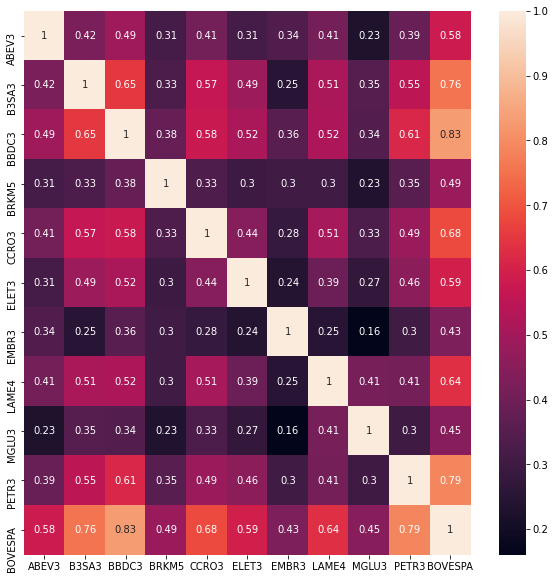

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot = True);

### Plot the histogram for daily returns

*   In general, there is no huge fluctuations in the daily stock price (most of the days), so they are around the mean of 0.
*   Based on the histogram the top 3 Risky Stocks **(Standard Deviation as Measure of Risk)**:
  1.   MGLU3
  2.   ELET3
  3.   PETR3

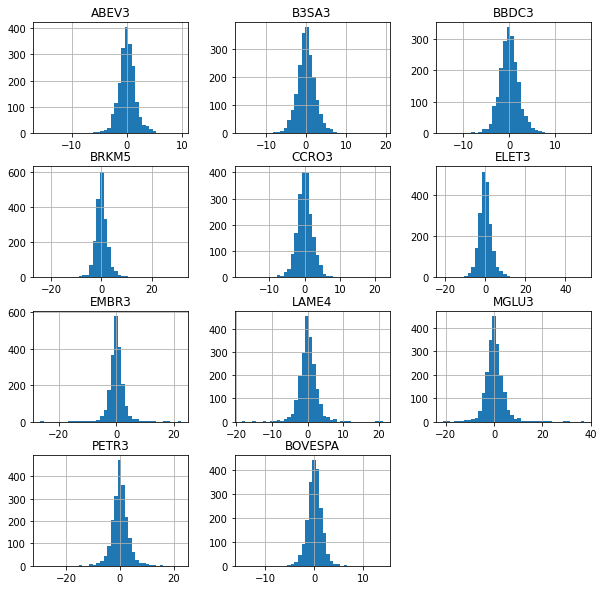

In [ ]:
daily_return.hist(figsize = (10, 10), bins = 40);

### Interactive Plot - Grouping all daily return data in a list:

In [ ]:
# Grouping all daily return data in a list - to print out the data in a interactive way
# Histogram - all together
data = []
for i in daily_return.columns:
  data.append(daily_return[i].values)

data

[array([ 0.        ,  1.77295784, -1.64852937, ...,  1.59767107,
         1.28663551,  3.81086774]),
 array([ 0.        ,  0.        , -1.84266849, ...,  3.05427763,
         1.03553267, -0.7421841 ]),
 array([ 0.        ,  5.49116538, -0.24318053, ...,  1.74473369,
         2.0246906 ,  4.64666505]),
 array([ 0.        ,  2.1292354 , -1.00647819, ..., -3.99622539,
        -3.27761387,  1.59267811]),
 array([ 0.        ,  1.78477456,  1.75348586, ..., -0.36630001,
         1.37867295,  4.7144195 ]),
 array([ 0.        ,  3.71470496,  1.1461343 , ...,  1.20481658,
        -0.6265688 ,  3.78309862]),
 array([ 0.        , -1.15412554, -2.06043139, ...,  1.71990203,
         0.08051714,  3.53981955]),
 array([ 0.        ,  0.        ,  0.        , ..., -1.74230267,
        -1.40206248,  3.63864845]),
 array([ 0.        ,  4.12462973, -0.59787999, ..., -1.14052459,
         3.50226768,  0.9952229 ]),
 array([ 0.        ,  3.72983338,  0.34011829, ..., -0.45434067,
        -4.29028088,  4.57

In [ ]:
# Figure Factory Module
# Kernel Density Estimate (KDE) Function - Histogram (Both on top of each other - together)
# Actual Return
fig = ff.create_distplot(data, daily_return.columns)
fig.show()

# Portfolio Management Example:
*   **Using pyfolio library**


In [ ]:
stocks_return = stocks_df.pct_change()
stocks_return.iloc[0] = 0
stocks_return

ABEV3     B3SA3     BBDC3  ...     MGLU3     PETR3   BOVESPA
Date                                      ...                              
2013-01-02  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
2013-01-03  0.017730  0.000000  0.054912  ...  0.041246  0.037298  0.012182
2013-01-04 -0.016485 -0.018427 -0.002432  ... -0.005979  0.003401 -0.012462
2013-01-07  0.011531 -0.005054 -0.023571  ... -0.023310 -0.013075 -0.009437
2013-01-08 -0.001175  0.008708 -0.003330  ... -0.006927 -0.028459 -0.012998
...              ...       ...       ...  ...       ...       ...       ...
2021-02-26 -0.012676 -0.010749 -0.009143  ...  0.005405 -0.034438 -0.019785
2021-03-01 -0.017832  0.000921 -0.032540  ...  0.015302 -0.006321  0.002726
2021-03-02  0.015977  0.030543  0.017447  ... -0.011405 -0.004543  0.010921
2021-03-03  0.012866  0.010355  0.020247  ...  0.035023 -0.042903 -0.003192
2021-03-04  0.038109 -0.007422  0.046467  ...  0.009952  0.045780  0.025644

[2018 rows x 11 columns]

*   Top 3 stocks that multiplied money (2013-01-02 - 2021-03-04):
  1.   MGLU3 - **69.7**
  2.   ELET3 - **7.88**
  3.   B3SA3 - **6.34**

In [ ]:
stocks_cumulative_return = (1 + stocks_return).cumprod()
stocks_cumulative_return.iloc[0] = 1
stocks_cumulative_return

ABEV3     B3SA3     BBDC3  ...      MGLU3     PETR3   BOVESPA
Date                                      ...                               
2013-01-02  1.000000  1.000000  1.000000  ...   1.000000  1.000000  1.000000
2013-01-03  1.017730  1.000000  1.054912  ...   1.041246  1.037298  1.012182
2013-01-04  1.000952  0.981573  1.052346  ...   1.035021  1.040826  0.999568
2013-01-07  1.012494  0.976612  1.027541  ...   1.010895  1.027218  0.990136
2013-01-08  1.011304  0.985117  1.024120  ...   1.003892  0.997984  0.977266
...              ...       ...       ...  ...        ...       ...       ...
2021-02-26  1.124407  5.168211  1.869912  ...  66.695151  1.243318  1.759153
2021-03-01  1.104357  5.172970  1.809065  ...  67.715711  1.235460  1.763949
2021-03-02  1.122001  5.330966  1.840629  ...  66.943396  1.229847  1.783213
2021-03-03  1.136437  5.386170  1.877896  ...  69.287933  1.177083  1.777522
2021-03-04  1.179745  5.346195  1.965155  ...  69.977502  1.230969  1.823104

[2018 rows x 11 columns]

### Suppose that you invest 1,000 brazilian reais in each stock (02 January, 2013)
*   February 5, 2021 (last day) - you would have 95057 reais
*   November 5, 2020 (highest multiple) - R$98899

In [ ]:
investment_calc = 1000 * stocks_cumulative_return.iloc[:, :10]
investment_calc['balance'] = investment_calc.sum(axis=1)
investment_calc['daily variation'] = investment_calc['balance'].pct_change()
investment_calc['daily variation'][0] = 0

In [ ]:
investment_calc['balance'][-1]

95057.61547862722

In [ ]:
highest_multiple = str(investment_calc['balance'].max())
highest_multiple_index = investment_calc['balance'][investment_calc['balance'] == investment_calc['balance'].max()].index[0]
print(f'Highest Multiple\n\nBalance: R${highest_multiple[:5]}\nDate: {highest_multiple_index.year}-{highest_multiple_index.month}-{highest_multiple_index.day}')

Highest Multiple

Balance: R$98899
Date: 2020-11-5


In [ ]:
investment_calc

ABEV3        B3SA3  ...       balance  daily variation
Date                                  ...                               
2013-01-02  1000.000000  1000.000000  ...  10000.000000         0.000000
2013-01-03  1017.729578  1000.000000  ...  10215.931757         0.021593
2013-01-04  1000.952007   981.573315  ...  10174.554115        -0.004050
2013-01-07  1012.494112   976.612302  ...  10102.075129        -0.007124
2013-01-08  1011.304160   985.117051  ...   9937.925426        -0.016249
...                 ...          ...  ...           ...              ...
2021-02-26  1124.407022  5168.210703  ...  91412.683499        -0.002385
2021-03-01  1104.356969  5172.969572  ...  92143.242935         0.007992
2021-03-02  1122.000961  5330.966425  ...  91503.587904        -0.006942
2021-03-03  1136.437024  5386.170324  ...  93727.486460         0.024304
2021-03-04  1179.745136  5346.195024  ...  95057.615479         0.014191

[2018 rows x 12 columns]

*   On average, the daily variation would be 0.13%
*   March 13, 2020 - Highest variation (20.64%)

In [ ]:
investment_calc['daily variation'].describe()

count    2018.000000
mean        0.001320
std         0.020107
min        -0.197145
25%        -0.008755
50%         0.001108
75%         0.011422
max         0.206382
Name: daily variation, dtype: float64

In [ ]:
highest_variation = str(investment_calc['daily variation'][investment_calc['daily variation'] == investment_calc['daily variation'].max()][0])
highest_variation_index = investment_calc['daily variation'][investment_calc['daily variation'] == investment_calc['daily variation'].max()].index[0]
print(f'Highest Daily Variation\n\nVariation: R${highest_variation[:6]}%\nDate: {highest_variation_index.year}-{highest_variation_index.month}-{highest_variation_index.day}')

Highest Daily Variation

Variation: R$0.2063%
Date: 2020-3-13


In [ ]:
fig = px.histogram(investment_calc, x = 'daily variation')
fig.show()

# Backtesting:

### Sharp Ratio - 1.04
*   The average return earned in excess of the risk-free rate of return

### Alpha - 0.25
*   Excess Return on the investment, adjusted for fluctuations and market-related volatility

### Beta - 1.01
*   The volatility of the portfolio compared to the systematic risk


### Annual Volatility - 31.92%
### Annual Return - 32.47%
### Cumulative Return - 850.58%

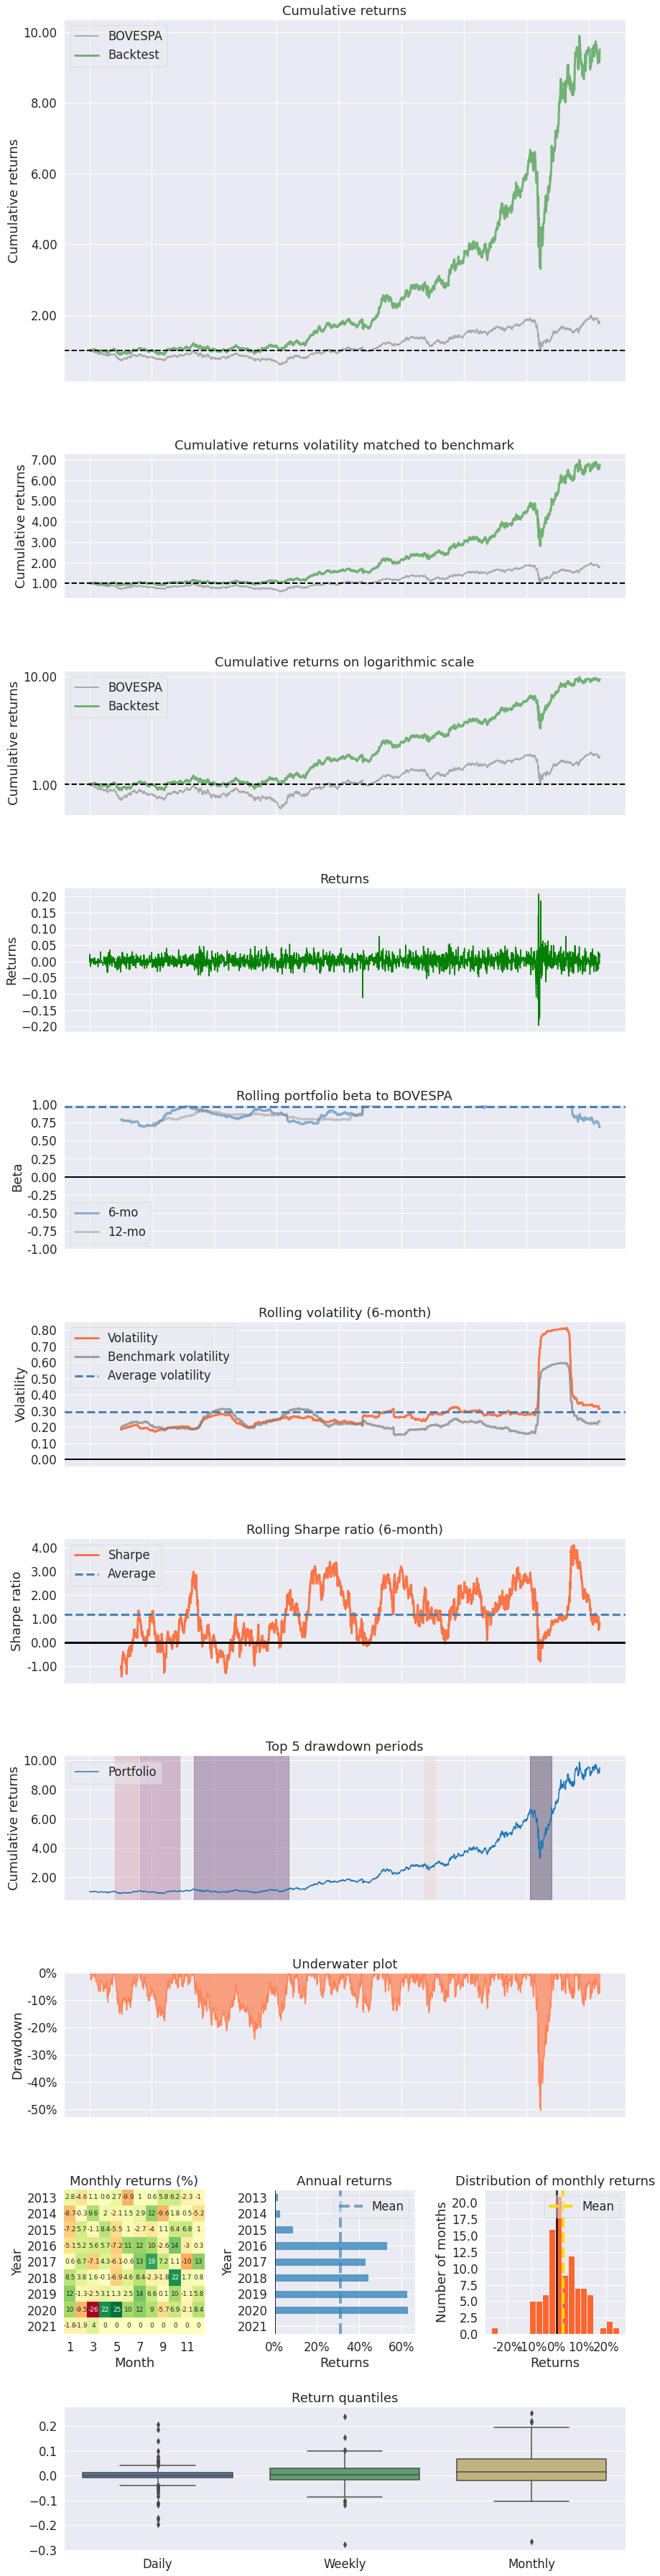

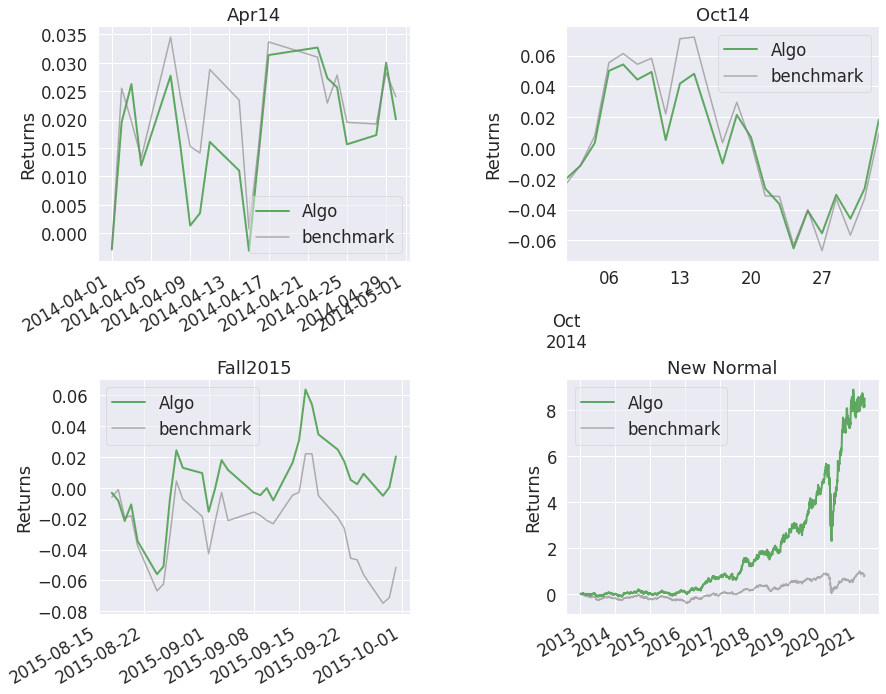

In [ ]:
pf.create_full_tear_sheet(investment_calc['daily variation'], benchmark_rets=stocks_return['BOVESPA'])

### Volatility in relation to the overall market (BOVESPA)

(0.4, 2.0)

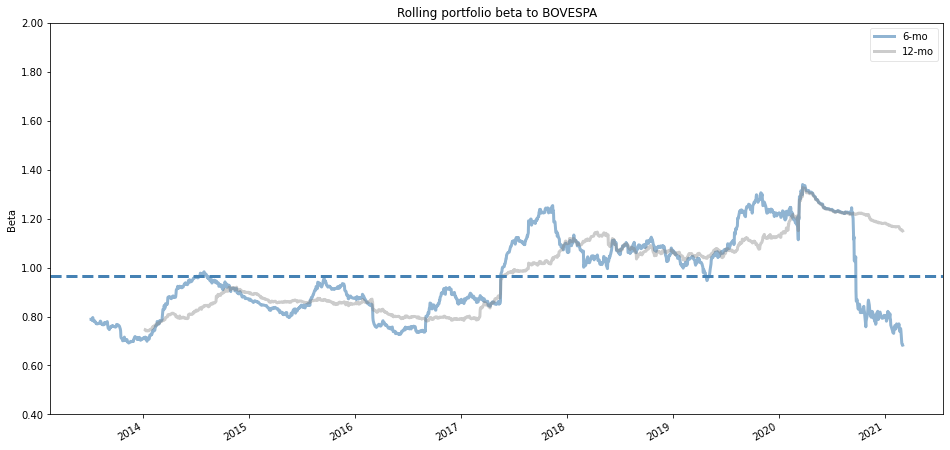

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(investment_calc['daily variation'], factor_returns=stocks_return['BOVESPA'], ax=ax1)
plt.ylim((0.4, 2))